In [1]:
#read necessary datas and import useful libraries

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
spray=pd.read_csv('spray.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
weather=pd.read_csv('weather.csv')


In [2]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [3]:
spray.head(2)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [4]:
test.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [5]:
train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
dtype: int64

In [6]:
#assign numbers for each mosquito species
train['Species_num'] = train.Species.map({'CULEX PIPIENS/RESTUANS':0, 'CULEX RESTUANS':1, 'CULEX PIPIENS':2, 'CULEX TERRITANS':3, 'CULEX SALINARIUS':4, 'CULEX TARSALIS':5,'CULEX ERRATICUS':6})

In [7]:
#get the month out of date and put it in a new column 
train['Date'] = pd.to_datetime(train.Date)
train['Month'] = train.Date.dt.month

In [8]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_num,Month
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0,5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,5


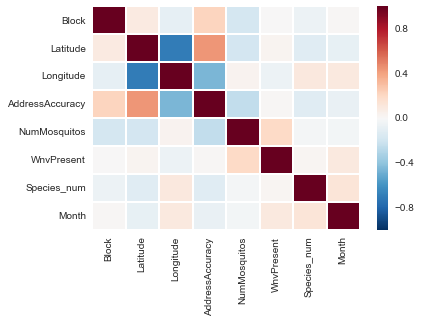

In [9]:
#correlation heat map to see if there is any relationship between features and the response value 

sns.heatmap(train.corr())

In [10]:
#create a new data frame with sum and max values of column "NumMosquitos' and "WnvPresent"
SumNumMosq=train.groupby(['Date','Address','Species','Trap','Latitude','Longitude'])[['NumMosquitos','WnvPresent']].agg([np.sum,np.max])
SumNumMosq.reset_index()



Date                                            Address  \
                                                                     
0    2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
1    2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
2    2007-05-29   1100 South Peoria Street, Chicago, IL 60608, USA   
3    2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   
4    2007-05-29     1500 North Long Avenue, Chicago, IL 60651, USA   
5    2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6    2007-05-29      1700 West 95th Street, Chicago, IL 60643, USA   
7    2007-05-29    2100 North Stave Street, Chicago, IL 60647, USA   
8    2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA   
9    2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA   
10   2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA   
11   2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA   
12   2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA   
13   2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA   
14   2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
15   2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
16   2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
17   2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
18   2007-05-29  6500 North Oak Park Avenue, Chicago, IL 60631,...   
19   2007-05-29   7500 North Oakley Avenue, Chicago, IL 60645, USA   
20   2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
21   2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
22   2007-05-29  8900 South Carpenter Street, Chicago, IL 60620...   
23   2007-05-29       North Streeter Drive, Chicago, IL 60611, USA   
24   2007-05-29       North Streeter Drive, Chicago, IL 60611, USA   
25   2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
26   2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
27   2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
28   2007-06-05    1100 South State Street, Chicago, IL 60605, USA   
29   2007-06-05   1100 West Chicago Avenue, Chicago, IL 60642, USA   
...         ...                                                ...   
8445 2013-09-26      6300 West 64th Street, Chicago, IL 60638, USA   
8446 2013-09-26   6700 South Kedzie Avenue, Chicago, IL 60629, USA   
8447 2013-09-26  7000 North Moselle Avenue, Chicago, IL 60646, USA   
8448 2013-09-26  7000 West Armitage Avenue, Chicago, IL 60707, USA   
8449 2013-09-26   7100 North Harlem Avenue, Chicago, IL 60631, USA   
8450 2013-09-26  7100 South South Shore Drive, Chicago, IL 6064...   
8451 2013-09-26  7900 South South Chicago Avenue, Chicago, IL 6...   
8452 2013-09-26  8200 South Kostner Avenue, Chicago, IL 60652, USA   
8453 2013-09-26  8900 South Carpenter Street, Chicago, IL 60620...   
8454 2013-09-26  8900 South Carpenter Street, Chicago, IL 60620...   
8455 2013-09-26  8900 South Muskegon Avenue, Chicago, IL 60617,...   
8456 2013-09-26    9100 West Higgins Road, Rosemont, IL 60018, USA   
8457 2013-09-26                                   Chicago, IL, USA   
8458 2013-09-26                  East 91st Place, Chicago, IL, USA   
8459 2013-09-26                  East 91st Place, Chicago, IL, USA   
8460 2013-09-26  ORD Terminal 5, O'Hare International Airport, ...   
8461 2013-09-26  ORD Terminal 5, O'Hare International Airport, ...   
8462 2013-09-26       South Brandon Avenue, Chicago, IL 60617, USA   
8463 2013-09-26       South Brandon Avenue, Chicago, IL 60617, USA   
8464 2013-09-26       South Brandon Avenue, Chicago, IL 60617, USA   
8465 2013-09-26       South Cottage Grove Avenue, Chicago, IL, USA   
8466 2013-09-26       South Cottage Grove Avenue, Chicago, IL, USA   
8467 2013-09-26       South Cottage Grove Avenue, Chicago, IL, USA   
8468 2013-09-26                South Doty Avenue, Chicago, IL, USA   
8469 2013-09-26      

In [11]:
# add new columns 
SumNumMosq['VirusSum']=SumNumMosq['WnvPresent']['sum']
SumNumMosq['VirusMax']=SumNumMosq['WnvPresent']['amax']
SumNumMosq['MosqSum']=SumNumMosq['NumMosquitos']['sum']


In [12]:
SumNumMosq.reset_index()
#only keep columns we want 
SumNumMosq = SumNumMosq[[ u'VirusSum', u'VirusMax', u'MosqSum']]


In [13]:
#only keep columns of interest
SumNumMosq.head(3)

VirusSum  \
                                                                                                                        
Date       Address                                          Species                Trap Latitude  Longitude             
2007-05-29 1100 Roosevelt Road, Chicago, IL 60608, USA      CULEX PIPIENS/RESTUANS T048 41.867108 -87.654224        0   
                                                            CULEX RESTUANS         T048 41.867108 -87.654224        0   
           1100 South Peoria Street, Chicago, IL 60608, USA CULEX RESTUANS         T091 41.862292 -87.648860        0   

                                                                                                             VirusMax  \
                                                                                                                        
Date       Address                                          Species                Trap Latitude  Longitude             
2007-05-29 1100 Roosevelt Road, Chicago, IL 60608, USA      CULEX PIPIENS/RESTUANS T048 41.867108 -87.654224        0   
                                                            CULEX RESTUANS         T048 41.867108 -87.654224        0   
           1100 South Peoria Street, Chicago, IL 60608, USA CULEX RESTUANS         T091 41.862292 -87.648860        0   

                                                                                                             MosqSum  
                                                                                                                      
Date       Address                                          Species                Trap Latitude  Longitude           
2007-05-29 1100 Roosevelt Road, Chicago, IL 60608, USA      CULEX PIPIENS/RESTUANS T048 41.867108 -87.654224       1  
                                                            CULEX RESTUANS         T048 41.867108 -87.654224       2  
           1100 South Peoria Street, Chicago, IL 60608, USA CULEX RESTUANS         T091 41.862292 -87.648860       1

In [14]:
SumNumMosq=SumNumMosq.reset_index()


In [15]:
SumNumMosq.head(3)

,Date,Address,Species,Trap,Latitude,Longitude,VirusSum,VirusMax,MosqSum
,,,,,,,,,
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,0,0,1
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,T048,41.867108,-87.654224,0,0,2
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,T091,41.862292,-87.648860,0,0,1


In [16]:
Newtrain=pd.merge(train,SumNumMosq,on=['Date','Address','Species','Trap','Latitude','Longitude'],how='inner')

AttributeError: 'numpy.ndarray' object has no attribute 'start'

In [17]:
SumNumMosq.corr()

,,Latitude,Longitude,VirusSum,VirusMax,MosqSum
,,,,,,
Latitude,,1.000000,-0.636842,0.018565,0.030862,-0.058984
Longitude,,-0.636842,1.000000,-0.068470,-0.076732,-0.001723
VirusSum,,0.018565,-0.068470,1.000000,0.806962,0.485083
VirusMax,,0.030862,-0.076732,0.806962,1.000000,0.233532
MosqSum,,-0.058984,-0.001723,0.485083,0.233532,1.000000


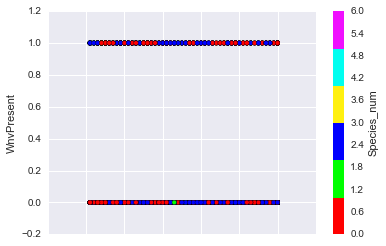

In [18]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFF00F','#00FFF0','#F00FFF'])
train.plot(kind='scatter', x='NumMosquitos', y='WnvPresent',c='Species_num',colormap=cmap_bold) 

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['NumMosquitos']
X = train[feature_cols]
y = train.WnvPresent
logreg.fit(X, y)
NumMosquitos_pred_class = logreg.predict(X)

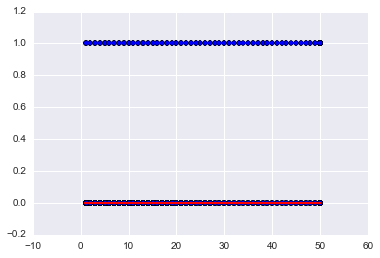

In [20]:
plt.scatter(train.NumMosquitos, train.WnvPresent)
plt.plot(train.NumMosquitos, NumMosquitos_pred_class, color='red')

In [21]:
weather.corr()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
Station,1.000000,0.016332,0.103995,0.007511,-0.007368,-0.016035
Tmax,0.016332,1.000000,0.859981,0.801733,-0.180596,0.029231
Tmin,0.103995,0.859981,1.000000,0.904358,-0.114755,-0.014283
DewPoint,0.007511,0.801733,0.904358,1.000000,-0.189207,0.003466
ResultSpeed,-0.007368,-0.180596,-0.114755,-0.189207,1.000000,0.096192
ResultDir,-0.016035,0.029231,-0.014283,0.003466,0.096192,1.000000


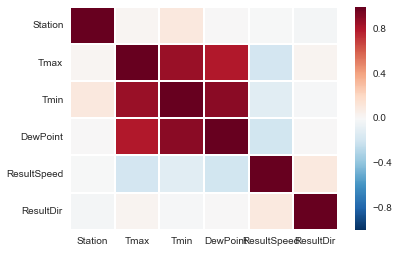

In [22]:
sns.heatmap(weather.corr())